<a href="https://colab.research.google.com/github/jmollan/PUCP/blob/main/Copia_de_Examen_2_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
import math
import seaborn as sns
from datetime import datetime as dt
from IPython.display import display


import warnings
warnings.filterwarnings('ignore')


In [6]:
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")


In [7]:
print(df.head(20))


     Año  MES        PRODUCTO PRESENTACIÓN  PAIS     ZONA  PRECIO  \
0   2017    1       COCA COLA   2.5 LITROS  PERU  ORIENTE     9.2   
1   2017    1       COCA COLA  MEDIO LITRO  PERU    NORTE     2.9   
2   2017    1           FANTA  MEDIO LITRO  PERU  ORIENTE     2.0   
3   2017    1       COCA COLA  MEDIO LITRO  PERU     LIMA     2.9   
4   2017    1           FANTA     2 LITROS  PERU  ORIENTE     5.4   
5   2017    1           FANTA     2 LITROS  PERU     LIMA     5.4   
6   2017    1      FANTA ZERO  MEDIO LITRO  PERU   CENTRO     2.5   
7   2017    1      FANTA ZERO     2 LITROS  PERU     LIMA     6.0   
8   2017    1      FANTA ZERO     2 LITROS  PERU  ORIENTE     6.0   
9   2017    1  INCA KOLA ZERO  MEDIO LITRO  PERU   CENTRO     3.0   
10  2017    1  INCA KOLA ZERO   2.5 LITROS  PERU    NORTE     9.2   
11  2017    1  INCA KOLA ZERO  MEDIO LITRO  PERU  ORIENTE     3.0   
12  2017    1  COCA COLA ZERO   2.5 LITROS  PERU   CENTRO     9.2   
13  2017    1  COCA COLA ZERO   2.

In [8]:
SALIDAXZONA = df.groupby('ZONA')['VENTAS'].sum()

In [9]:
print(SALIDAXZONA)

ZONA
CENTRO     1.272378e+08
LIMA       1.180202e+08
NORTE      1.335199e+08
ORIENTE    1.611711e+08
SUR        1.350457e+08
Name: VENTAS, dtype: float64


<Axes: xlabel='ZONA'>

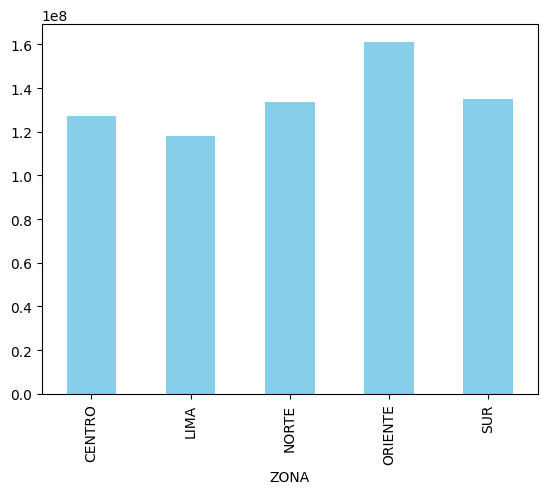

In [10]:
SALIDAXZONA.plot(kind='bar',color='skyblue')


In [12]:
PRODUCTOS_UNICOS = df['PRODUCTO'].unique()

In [44]:
print(PRODUCTOS_UNICOS)


['COCA COLA' 'FANTA' 'FANTA ZERO' 'INCA KOLA ZERO' 'COCA COLA ZERO'
 'SPRITE' 'SPRITE ZERO' 'INCA KOLA']


In [45]:
VENTAS_PRODUCTO = df.groupby('PRODUCTO')['VENTAS'].sum()
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

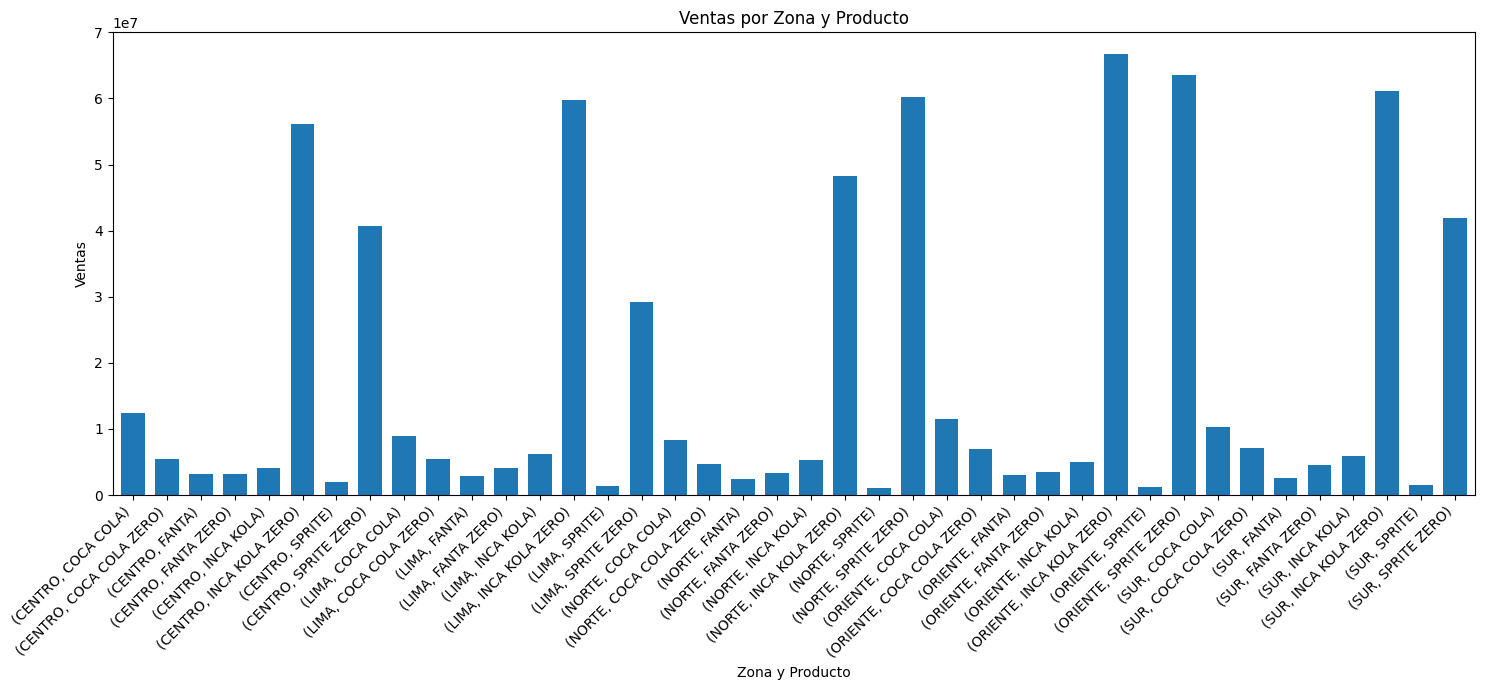

In [16]:
import matplotlib.pyplot as plt

# Agrupar datos
VENTAS_PRODUCTO_ZONA = df.groupby(['ZONA','PRODUCTO'])['VENTAS'].sum()

# Crear gráfico
plt.figure(figsize=(15, 7))  # Ajustar tamaño del gráfico
VENTAS_PRODUCTO_ZONA.plot(kind='bar', width=0.7)  # Gráfico de barras con un ancho de barra de 0.7

# Rotar etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona y Producto')
plt.ylabel('Ventas')

# Mostrar gráfico
plt.tight_layout()
plt.show()


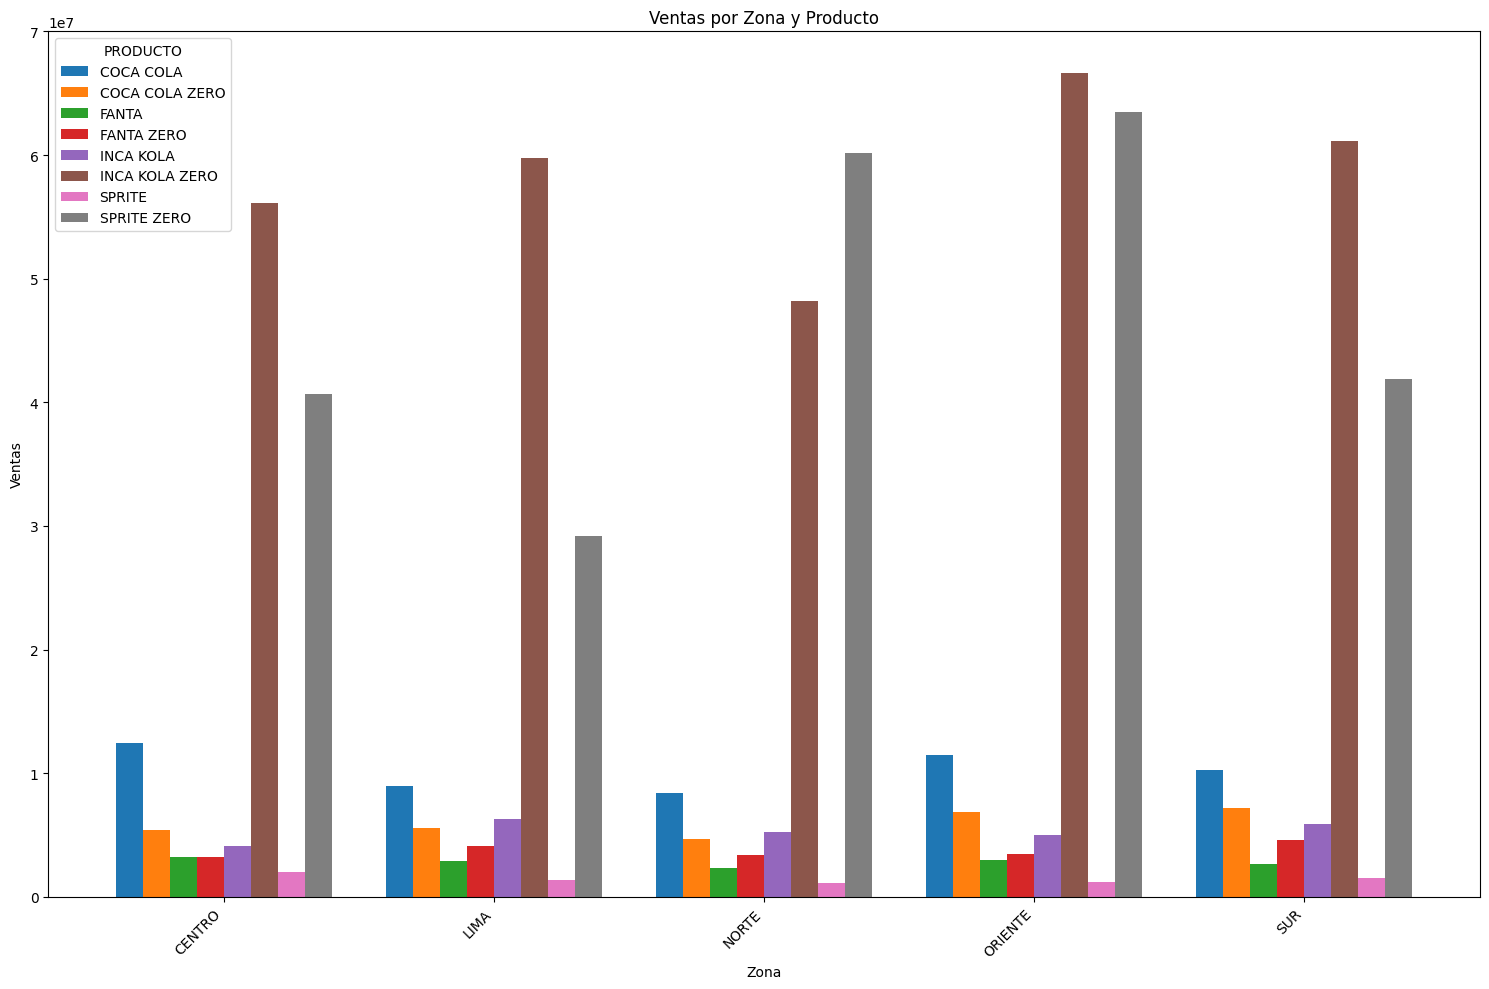

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Leemos la base de datos original
df = pd.read_excel ("BASE DATA THE COCA COLA COMPANY.xlsx")

# Agrupar datos y reestructurar el DataFrame
pivot_df = df.groupby(['ZONA', 'PRODUCTO'])['VENTAS'].sum().unstack()

# Gráfico de barras agrupadas
ax = pivot_df.plot(kind='bar', figsize=(15, 10), width=0.8)

# Título y etiquetas
plt.title('Ventas por Zona y Producto')
plt.xlabel('Zona')
plt.ylabel('Ventas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor visualización
plt.tight_layout()

plt.show()



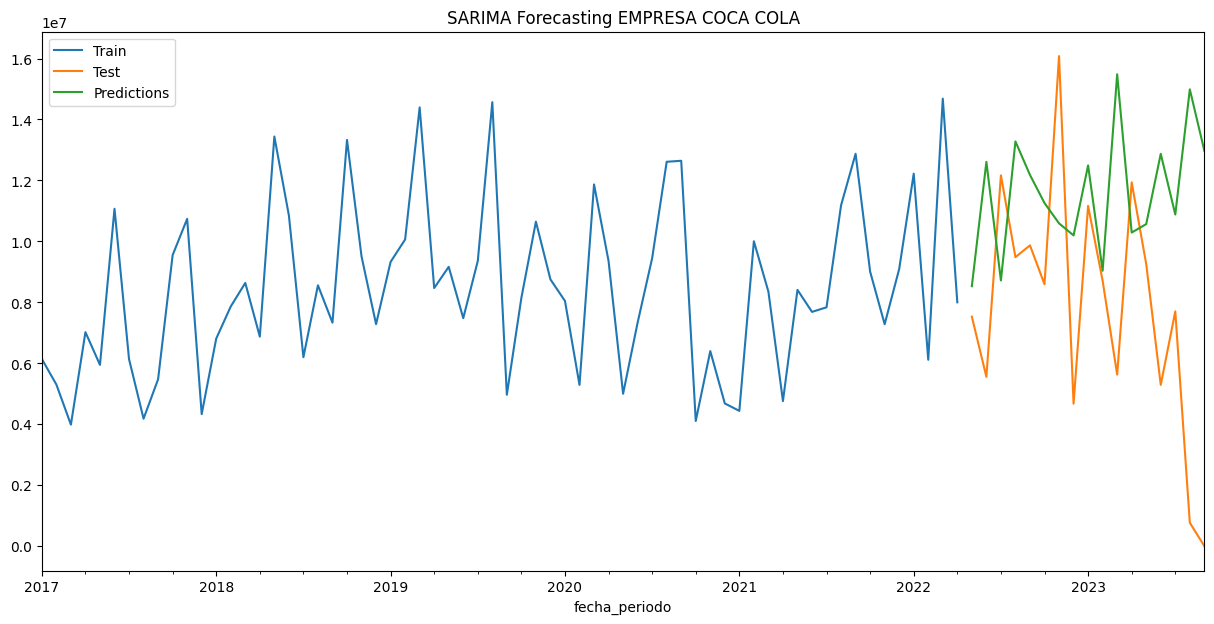

In [34]:
# SARIMA FORECASTING / EMPRESA COCA COLA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Leer el archivo Excel / CORREGIDO
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Dividir datos en entrenamiento y prueba
train_size = int(0.8 * len(df_aggregated))
train, test = df_aggregated[:train_size], df_aggregated[train_size:]

# Ajustar el modelo SARIMA con los mejores parámetros encontrados
best_order = (2, 1, 2)
best_seasonal_order = (2, 1, 2, 12)
sarima_model = SARIMAX(train, order=best_order, seasonal_order=best_seasonal_order)
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones
predictions = sarima_result.predict(start=test.index[0], end=test.index[-1], dynamic=True)

# Graficar resultados
plt.figure(figsize=(15, 7))
train.plot(label='Train', legend=True)
test.plot(label='Test', legend=True)
predictions.plot(label='Predictions', legend=True)
plt.title('SARIMA Forecasting EMPRESA COCA COLA')
plt.show()


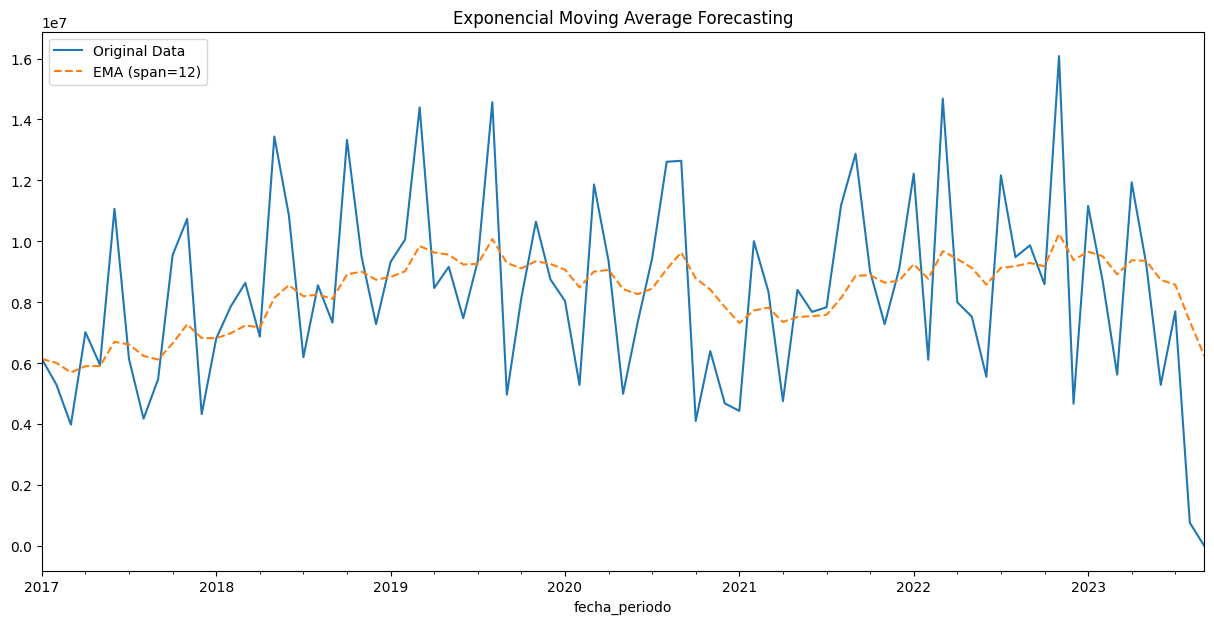

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel
df_corrected = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df_corrected['fecha_periodo'] = pd.to_datetime(df_corrected['fecha_periodo'])
df_corrected.set_index('fecha_periodo', inplace=True)

# Agregar ventas
df_aggregated = df_corrected['VENTAS'].resample('M').sum()

# Calcular la Media Móvil Exponencial
span = 12  # Ajuste de 12 meses para una EMA de un año para datos mensuales)
ema = df_aggregated.ewm(span=span, adjust=False).mean()

# Graficar resultados
plt.figure(figsize=(15, 7))
df_aggregated.plot(label='Original Data', legend=True)
ema.plot(label=f'EMA (span={span})', legend=True, linestyle='--')
plt.title('Exponencial Moving Average Forecasting')
plt.show()


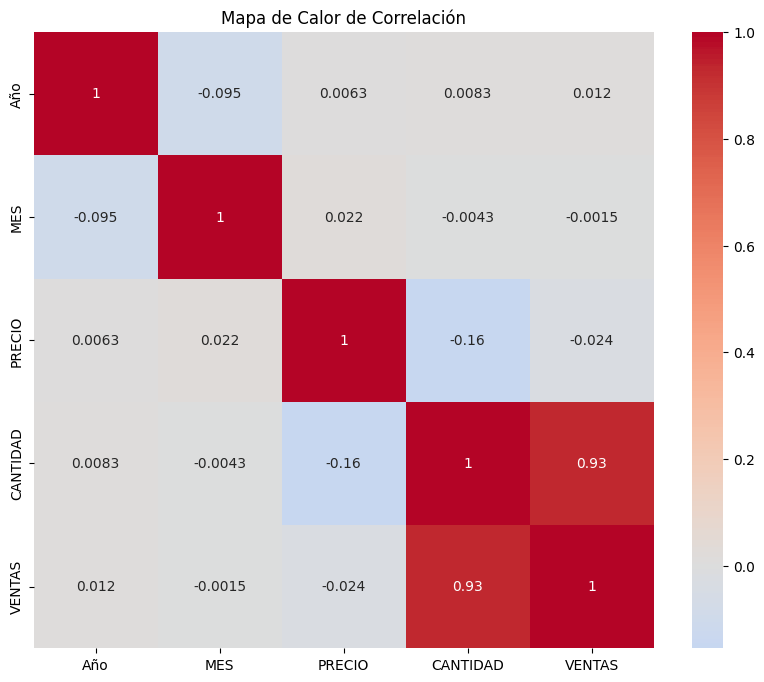

In [48]:


# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear un mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación')
plt.show()


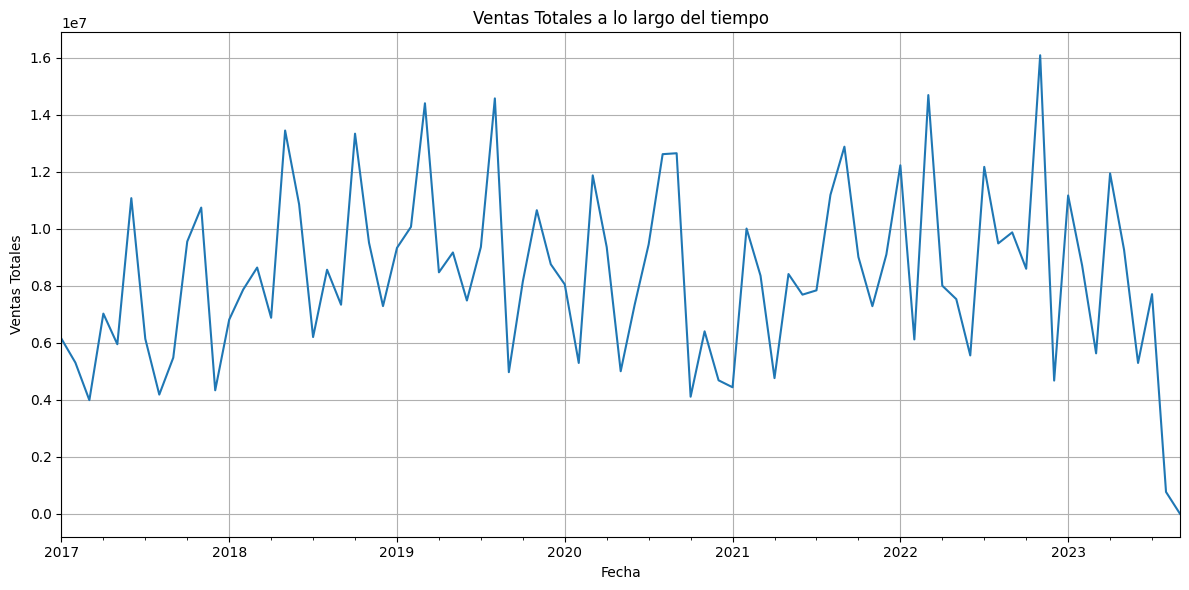

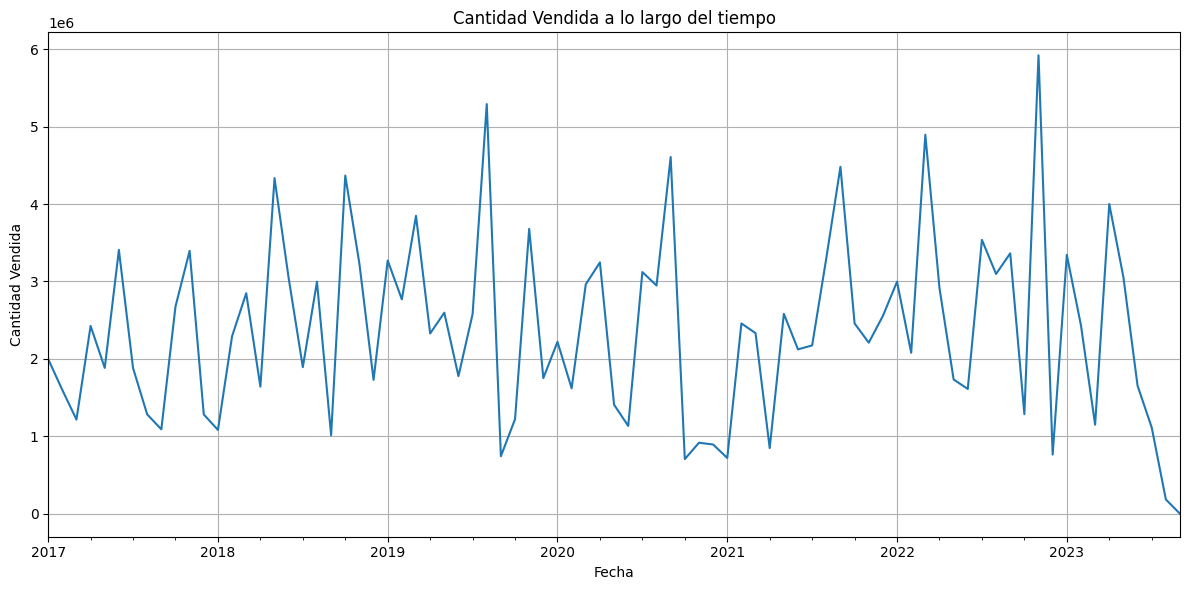

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Gráfico de líneas para las Ventas Totales a lo largo del tiempo
sales_time_series = df['VENTAS'].resample('M').sum()
plt.figure(figsize=(12, 6))
sales_time_series.plot()
plt.title('Ventas Totales a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para la Cantidad Vendida a lo largo del tiempo
# Asumiendo que hay una columna llamada 'CANTIDAD' que representa la cantidad vendida
quantity_time_series = df['CANTIDAD'].resample('M').sum()
plt.figure(figsize=(12, 6))
quantity_time_series.plot()
plt.title('Cantidad Vendida a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.grid(True)
plt.tight_layout()
plt.show()


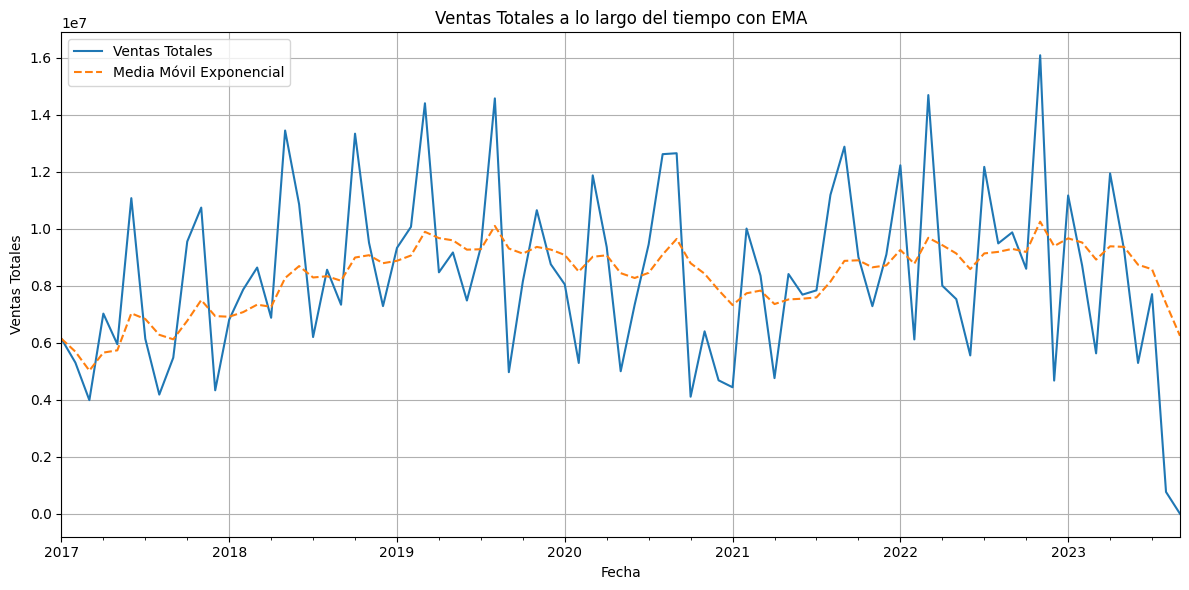

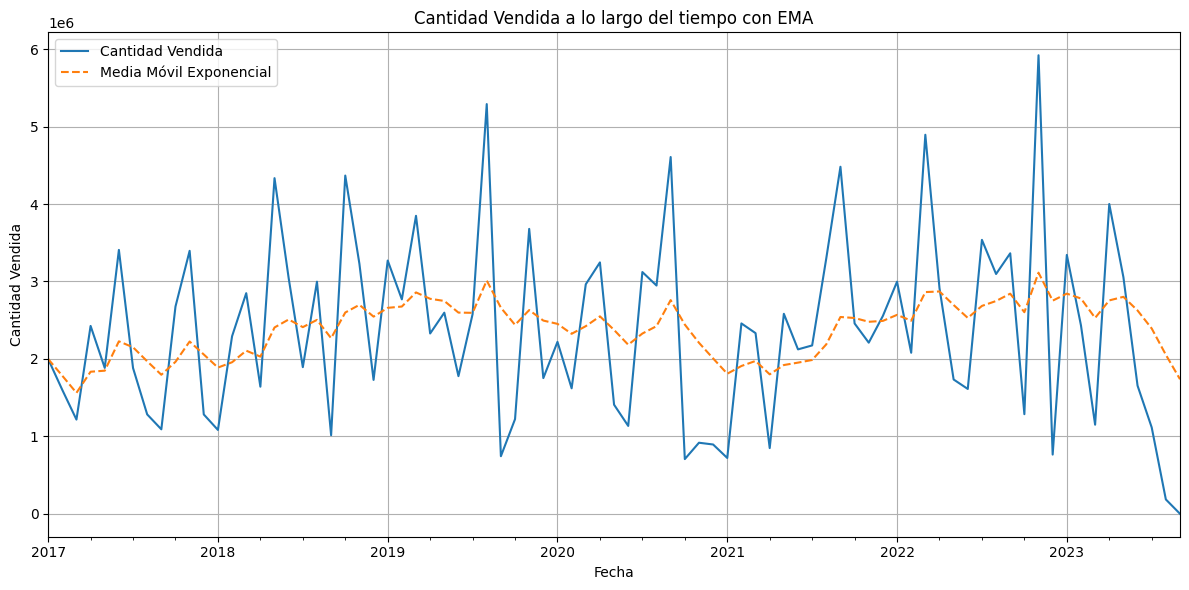

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")

# Convertir la columna 'fecha_periodo' a formato datetime y establecerla como índice
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Gráfico de líneas para las Ventas Totales a lo largo del tiempo
sales_time_series = df['VENTAS'].resample('M').sum()
sales_ema = sales_time_series.ewm(span=12).mean()  # EMA con una ventana de 12 meses

plt.figure(figsize=(12, 6))
sales_time_series.plot(label='Ventas Totales')
sales_ema.plot(label='Media Móvil Exponencial', linestyle='--')
plt.title('Ventas Totales a lo largo del tiempo con EMA')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico de líneas para la Cantidad Vendida a lo largo del tiempo
# Asumiendo que hay una columna llamada 'CANTIDAD' que representa la cantidad vendida
quantity_time_series = df['CANTIDAD'].resample('M').sum()
quantity_ema = quantity_time_series.ewm(span=12).mean()  # EMA con una ventana de 12 meses

plt.figure(figsize=(12, 6))
quantity_time_series.plot(label='Cantidad Vendida')
quantity_ema.plot(label='Media Móvil Exponencial', linestyle='--')
plt.title('Cantidad Vendida a lo largo del tiempo con EMA')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


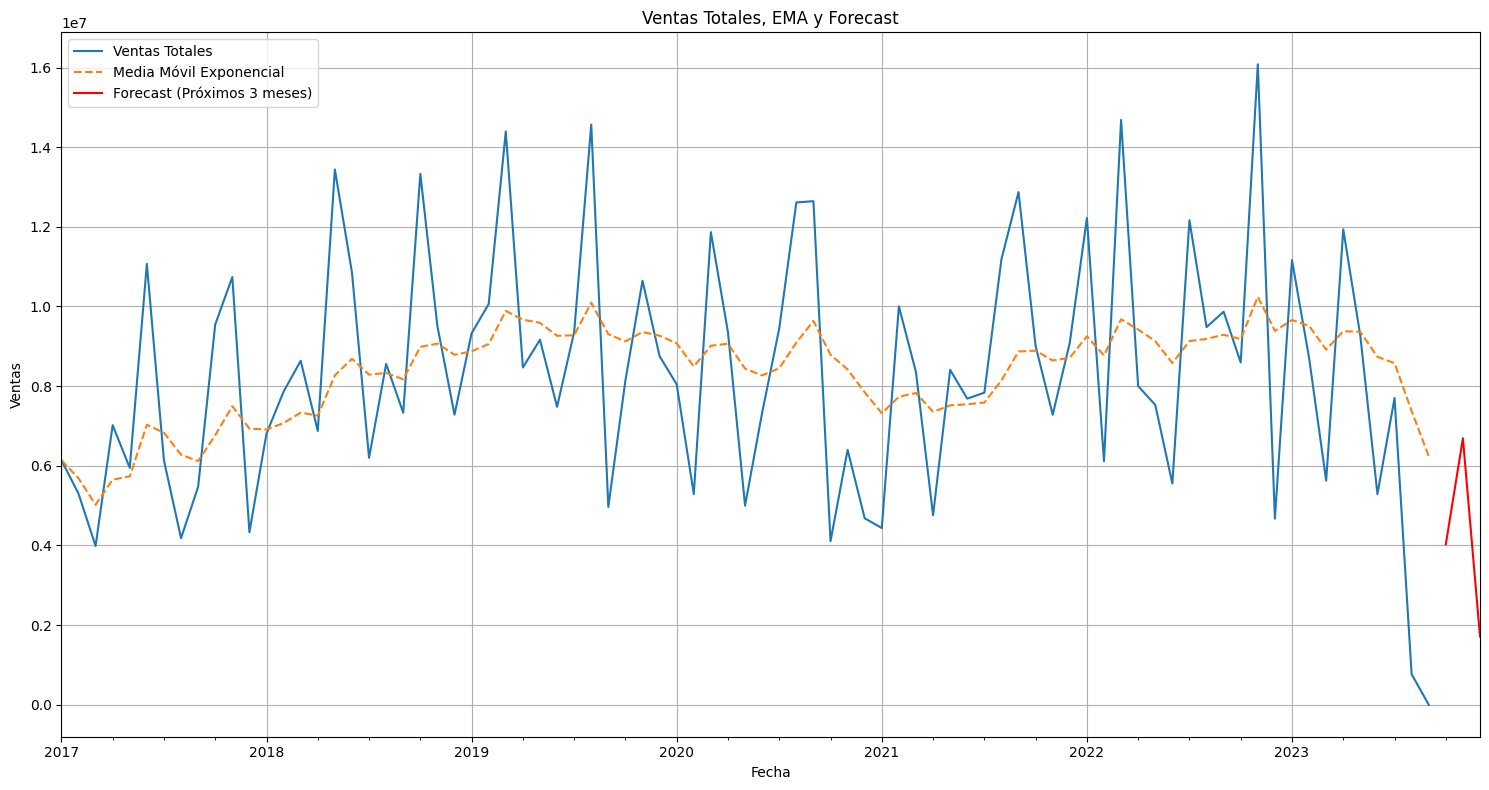

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cargar los datos
df = pd.read_excel("BASE DATA THE COCA COLA COMPANY.xlsx")
df['fecha_periodo'] = pd.to_datetime(df['fecha_periodo'])
df.set_index('fecha_periodo', inplace=True)

# Agregar las ventas para obtener una serie temporal
time_series = df['VENTAS'].resample('M').sum()

# Definir parámetros para el modelo SARIMA (estos parámetros pueden requerir otro ajuste)
p, d, q = 1, 1, 1
P, D, Q, S = 1, 1, 1, 12

# Ajustar el modelo SARIMA
sarima_model = SARIMAX(time_series, order=(p, d, q), seasonal_order=(P, D, Q, S))
sarima_result = sarima_model.fit(disp=False)

# Realizar predicciones para los próximos 3 meses
forecast = sarima_result.get_forecast(steps=3).predicted_mean

# Calcular la EMA
sales_ema = time_series.ewm(span=12).mean()

# Gráfico de ventas, EMA y predicciones
plt.figure(figsize=(15, 8))
time_series.plot(label='Ventas Totales', legend=True)
sales_ema.plot(label='Media Móvil Exponencial', linestyle='--', legend=True)
forecast.plot(label='Forecast (Próximos 3 meses)', color='red', legend=True)

plt.title('Ventas Totales, EMA y Forecast')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()
